<a href="https://colab.research.google.com/github/jahid-fahim/B.Sc-Final-Year-Project/blob/main/96_78_(30_Noise)Binary_(OrganAMNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [ ]:
!pip install torch torchvision pennylane medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.3 MB/s eta 0:00:00
  

# Import Libraries

In [ ]:
# Quantum Computing
import pennylane as qml
from pennylane import numpy as np

# Data Handling
import medmnist
from medmnist import INFO, Evaluator
import torch.utils.data as data
from torchvision import datasets, transforms

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from medmnist import OrganAMNIST as DATASETS
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Utilities
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

100%|██████████| 38.2M/38.2M [00:02<00:00, 16.5MB/s]


Using downloaded and verified file: /root/.medmnist/organamnist.npz
Using downloaded and verified file: /root/.medmnist/organamnist.npz
Full dataset size: 58830


<ipython-input-3-49ee14a676fe>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_labels = [int(label) for _, label in full_dataset]


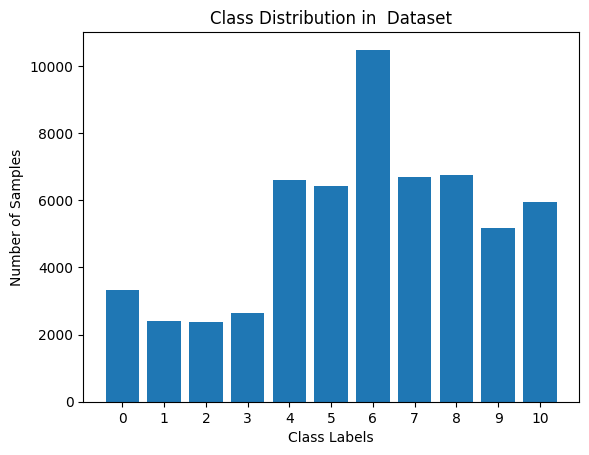

In [ ]:
from torch.utils.data import DataLoader, ConcatDataset
from collections import Counter

# Load each split of the  dataset
train_dataset = DATASETS(split='train', download=True, transform=transforms.ToTensor())
val_dataset = DATASETS(split='val', download=True, transform=transforms.ToTensor())
test_dataset = DATASETS(split='test', download=True, transform=transforms.ToTensor())

# Combine the datasets
full_dataset = ConcatDataset([train_dataset, val_dataset, test_dataset])

# Print the number of samples in the full dataset
print(f"Full dataset size: {len(full_dataset)}")

# Get all labels from the dataset
all_labels = [int(label) for _, label in full_dataset]

# Count the number of samples per class
class_counts = Counter(all_labels)

# Sort counts by class (optional)
sorted_class_counts = dict(sorted(class_counts.items()))

# Extract classes and counts
classes = list(sorted_class_counts.keys())
counts = list(sorted_class_counts.values())

# Plot the histogram
plt.bar(classes, counts)
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in  Dataset')
plt.xticks(classes)
plt.show()

In [ ]:
download = True
NUM_EPOCHS = 10
BATCH_SIZE = 64
lr = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.8], std=[0.8])
])

# Load Dataset

In [ ]:
from torch.utils.data import Subset, DataLoader, random_split, ConcatDataset
import torchvision.transforms as transforms
import torch
import random

# Set batch size
BATCH_SIZE = 64

# Step 1: Download the Full TissueMNIST Dataset
train_dataset = DATASETS(split='train', download=True, transform=transform)
val_dataset = DATASETS(split='val', download=True, transform=transform)
test_dataset = DATASETS(split='test', download=True, transform=transform)

# Combine the datasets
full_dataset = ConcatDataset([train_dataset, val_dataset, test_dataset])

# Specify the two classes you want to keep
target_classes = [0, 1]  # Only two classes

# Step 2: Filter Dataset for the Two Classes
def filter_classes(dataset, target_classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in target_classes]
    return Subset(dataset, indices)

# Filter the full dataset to keep only the two target classes
filtered_dataset = filter_classes(full_dataset, target_classes)

# Custom Dataset wrapper to remap labels to 0 and 1
class RelabelDataset(torch.utils.data.Dataset):
    def __init__(self, subset, target_classes):
        self.subset = subset
        self.target_classes = target_classes

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        img, label = self.subset[idx]
        # Relabel class 4 → 0 and class 5 → 1
        new_label = torch.tensor(self.target_classes.index(label.item()))
        return img, new_label

# Apply the RelabelDataset wrapper
relabeled_dataset = RelabelDataset(filtered_dataset, target_classes)

# Step 3: Find the minimum class size (to balance the dataset)
def get_min_class_size(dataset):
    class_counts = {0: 0, 1: 0}  # Since we have only two classes (0 and 1)

    for _, label in dataset:
        class_counts[label.item()] += 1  # Count occurrences of each class

    # Get the minimum class size
    min_class_size = min(class_counts.values())
    print(f"Class sizes: {class_counts}")
    print(f"Minimum class size: {min_class_size}")

    return min_class_size

# Find the minimum class size
min_class_size = get_min_class_size(relabeled_dataset)

# Step 4: Create a balanced dataset with equal samples from each class
def get_balanced_subset(dataset, min_class_size):
    class_indices = {0: [], 1: []}  # Only two classes

    # Group indices by class
    for idx, (_, label) in enumerate(dataset):
        class_indices[label.item()].append(idx)

    # Randomly sample `min_class_size` instances from each class
    selected_indices = []
    for cls in [0, 1]:  # Only two classes
        selected_indices.extend(random.sample(class_indices[cls], min_class_size))

    return Subset(dataset, selected_indices)

# Create the balanced subset
balanced_subset = get_balanced_subset(relabeled_dataset, min_class_size)

# Step 5: Split the Balanced Dataset into Train and Test Sets
train_size = int(0.8 * len(balanced_subset))
test_size = len(balanced_subset) - train_size

# Split the balanced subset
train_dataset, test_dataset = random_split(balanced_subset, [train_size, test_size])

# Create DataLoaders for the Balanced Dataset
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Display Dataset Information
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")


Using downloaded and verified file: /root/.medmnist/organamnist.npz
Using downloaded and verified file: /root/.medmnist/organamnist.npz
Using downloaded and verified file: /root/.medmnist/organamnist.npz
Class sizes: {0: 3313, 1: 2407}
Minimum class size: 2407
Number of training samples: 3851
Number of testing samples: 963


In [ ]:
n_classes = len(target_classes)
print(f"Number of classes: {n_classes}")

Number of classes: 2


# For Quantum Neural Network

**Outer circuit function:**

In [ ]:
# # Define the quality embedding network (classical network to estimate noise level)
# class QualityEmbeddingNetwork(nn.Module):
#     def __init__(self, input_size, embedding_size):
#         super(QualityEmbeddingNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, 128)
#         self.fc2 = nn.Linear(128, embedding_size)
#         self.fc3 = nn.Linear(embedding_size, 1)  # Outputs a noise quality score

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         quality = torch.sigmoid(self.fc3(x))  # Noise level between 0 and 1
#         return quality

**Build Quantum Circuit**

In [ ]:
n_qubits = 8
n_layers = 5
dev = qml.device('default.qubit', wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Embed classical data into quantum state (with padding if needed)
    qml.templates.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0.0, normalize=True)

    # Initial Encoder
    for i in range(n_qubits):
        qml.RX(weights[0, i, 0], wires=i)
        qml.RZ(weights[0, i, 1], wires=i)

    #Additional Rotation Layer
    for i in range(n_qubits):
        qml.RZ(weights[1, i, 0], wires=i)

    # Entangling layers
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, (i + 2) % n_qubits])

    # Hierarchical Quantum Convolutional Layer (HQCL)
    for i in range(n_layers):
        #Entangling Quantum Convolutional Layer
        for j in range(n_qubits):
            qml.RY(weights[i, j, 0], wires=j)
            qml.RZ(weights[i, j, 1], wires=j)
        qml.CNOT(wires = [i % n_qubits, (i + 1) % n_qubits])

        #Quantum Convolutional layers
        for j in range(n_qubits):
            qml.RX(weights[i, j, 0], wires=j)
            qml.RY(weights[i, j, 1], wires=j)
            qml.CNOT(wires=[j, (j + 1) % n_qubits])  # Circular entanglement

    #Custom Entangling with Quantum Convolutional Layer
    for j in range(n_qubits):
        qml.RX(weights[i, j, 0], wires=j)
        qml.CNOT(wires=[j, (j + 1) % n_qubits])
        qml.RZ(weights[i, j, 1], wires=j)

    # # Adaptive Quantum Pooling
    # phi_values = [weights[2, i, 0] for i in range(n_qubits // 2)]
    # for i in range(n_qubits // 2):
    #     phi = torch.tensor([0.2*i], requires_grad=True)*quality
    #     qml.CNOT(wires=[i, n_qubits - 1 - i])
    #     qml.RY(phi, wires=n_qubits - 1 - i)
    #     qml.RY(phi_values[i], wires=n_qubits - 1 - i)
    #     qml.CNOT(wires=[i, n_qubits - 1 - i])

    qml.RX(np.pi, wires=0)
    qml.RY(np.pi, wires= 1)
    qml.RZ(np.pi, wires=2)
    qml.CNOT(wires=[0, 1])


    # Measure PauliZ and PauliX for more varied information
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)] + [qml.expval(qml.PauliX(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_layers, n_qubits, 2)}  # Add shape for 'quality'
# Define the quantum layer in PyTorch using TorchLayer from Pennylane
qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)


In [ ]:
# print(qml.draw(quantum_circuit)(torch.zeros(n_qubits), torch.zeros((n_layers, n_qubits, 3)), torch.zeros(1)))

In [ ]:
# print(qml.draw(quantum_circuit)(torch.zeros(n_qubits), torch.zeros((n_layers, n_qubits, 3))))


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
from tqdm import tqdm


class Encoder(nn.Module):
    def __init__(self, image_dim, latent_dim):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        return self.encoder(x)



In [ ]:
class HybridQNN(nn.Module):
  def __init__(self, n_qubits, n_layers, n_classes, input_size):
    super(HybridQNN, self).__init__()
    self.encoder = Encoder(input_size, 64)
    self.quantum_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)
    self.fc = nn.Linear(2*n_qubits, n_classes)
    self.preprocess = nn.Linear(64, 2*n_qubits)

  def forward(self, x):
    x = self.encoder(x)
    x = x.view(x.size(0), -1)
    x = self.preprocess(x)
    x = self.quantum_layer(x)
    x = self.fc(x)
    return x

# class HybridQNN(nn.Module):
#     def __init__(self, n_qubits, n_layers, n_classes, input_size):
#         super(HybridQNN, self).__init__()
#         self.encoder = Encoder(input_size, 64)
#         self.quality_embedding = QualityEmbeddingNetwork(64, embedding_size=16)  # Changed input_size to 64
#         self.quantum_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)
#         self.fc = nn.Linear(2 * n_qubits, n_classes)
#         self.preprocess = nn.Linear(64 + 1, 2 * n_qubits) # Changed to match concatenated dimension

#     def forward(self, x):
#         x = self.encoder(x)
#         # Reshape the output of the encoder to match the input of the quality embedding network
#         x_for_quality = x.view(x.size(0), -1)  # Reshape to (batch_size, flattened_size)
#         quality = self.quality_embedding(x_for_quality)
#         # quality = quality.view(quality.size(0), -1)
#         # quality = quality.unsqueeze(1).unsqueeze(1).repeat(1, x.shape[2], x.shape[3], 1)
#         x = x.view(x.size(0), -1)
#         # x = torch.cat([x, quality], dim=1)  # Check if dim=1 is correct for concatenation
#         x = torch.cat([x, quality], dim=1) # Concatenate along feature dimension
#         x = self.preprocess(x)
#         x = self.quantum_layer(x)
#         x = self.fc(x)
#         x = torch.sigmoid(x)
#         return x

In [ ]:
input_size = 28
model = HybridQNN(n_qubits, n_layers, n_classes, input_size).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr)

In [ ]:
def get_noisy_labels(targets, noise_rate=0.3):
    noise_mask = torch.rand(targets.size()) < noise_rate
    noisy_labels = targets.clone()
    for i in range(len(noisy_labels)):
        if noise_mask[i]:
            possible_classes = list(set(range(n_classes)) - {targets[i].item()})
            noisy_labels[i] = torch.tensor(np.random.choice(possible_classes))
    return noisy_labels

In [ ]:
# Train model
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    model.train()
    for inputs, targets in tqdm(train_loader):
        optimizer.zero_grad()

        # Add dynamic noise during training
        noisy_labels = get_noisy_labels(targets)

        # Forward pass, including noisy labels
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, noisy_labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_samples += targets.size(0)

    # Calculate accuracy
    avg_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_samples
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

100%|██████████| 61/61 [00:44<00:00,  1.38it/s]


Epoch 1/10, Loss: 0.6602, Accuracy: 0.8857


100%|██████████| 61/61 [00:46<00:00,  1.32it/s]


Epoch 2/10, Loss: 0.6312, Accuracy: 0.9522


100%|██████████| 61/61 [00:43<00:00,  1.40it/s]


Epoch 3/10, Loss: 0.6372, Accuracy: 0.9431


100%|██████████| 61/61 [00:44<00:00,  1.39it/s]


Epoch 4/10, Loss: 0.6228, Accuracy: 0.9694


100%|██████████| 61/61 [00:43<00:00,  1.41it/s]


Epoch 5/10, Loss: 0.6243, Accuracy: 0.9759


100%|██████████| 61/61 [00:43<00:00,  1.41it/s]


Epoch 6/10, Loss: 0.6259, Accuracy: 0.9662


100%|██████████| 61/61 [00:43<00:00,  1.39it/s]


Epoch 7/10, Loss: 0.6296, Accuracy: 0.9769


100%|██████████| 61/61 [00:45<00:00,  1.33it/s]


Epoch 8/10, Loss: 0.6172, Accuracy: 0.9733


100%|██████████| 61/61 [00:43<00:00,  1.39it/s]


Epoch 9/10, Loss: 0.6175, Accuracy: 0.9730


100%|██████████| 61/61 [00:43<00:00,  1.41it/s]

Epoch 10/10, Loss: 0.6142, Accuracy: 0.9764


In [ ]:
model.eval()
running_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm(test_loader):
    # Move inputs and targets to the device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Add dynamic noise during testing (if applicable)
        # noisy_labels = get_noisy_labels(labels)

        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Test Loss: {running_loss / len(test_loader)}')
print(f'Test Accuracy: {100 * correct / total}%')

100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

Test Loss: 0.4005025029182434
Test Accuracy: 96.78089304257529%


**Encoder:**

**Model:**

In [ ]:
# Test model
model.eval()
running_loss = 0.0
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass with clean labels
        outputs = model(images)

        # Compute loss using the clean labels
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Prediction of the test dataset
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Print average test loss and accuracy
print(f'Test Loss: {running_loss / len(test_loader):.4f}')
print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Optional: Analyze predictions
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_predictions))


100%|██████████| 16/16 [00:04<00:00,  3.44it/s]

Test Loss: 0.4005
Test Accuracy: 96.78%
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       461
           1       0.94      1.00      0.97       502

    accuracy                           0.97       963
   macro avg       0.97      0.97      0.97       963
weighted avg       0.97      0.97      0.97       963



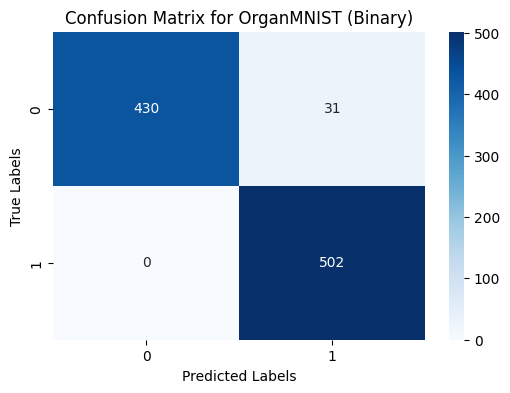

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have 'all_labels' and 'all_predictions' from your previous code
# These lists should contain the true labels and predicted labels for your test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for OrganMNIST (Binary)")
plt.show()

In [ ]:

# class HQCNN(nn.Module):
#     def __init__(self, image_dim, latent_dim, n_classes=n_classes, num_quantum_layers=8):
#         super(HQCNN, self).__init__()
#         self.encoder = Encoder(image_dim, latent_dim)
#         self.quantum_layers = nn.ModuleList([qlayer for _ in range(num_quantum_layers)])
#         self.fc1  = nn.Linear(2*n_qubits, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc_out = nn.Linear(64, n_classes)
#         self.dropout = nn.Dropout(0.5)

#     def forward(self, x):
#         x = self.encoder(x)
#         x = x.view(x.size(0), -1)
#         for quantum_layer in self.quantum_layers:
#             x = quantum_layer(x)

#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.fc_out(x)
#         return x



**Model Instantiate:**

In [ ]:
# # Instantiate model
# image_dim = (1, 28, 28)
# latent_dim = 64
# n_classes = n_classes
# model = HQCNN(image_dim, latent_dim)


**Compile Model:**

**Add Dynamic Noise During Training and Testing:**

# **Traing Loop**

In [ ]:
# # Training Loop
# for epoch in range(NUM_EPOCHS):
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0

#     model.train()
#     for inputs, targets in tqdm(train_loader):
#         optimizer.zero_grad()

#         # Add dynamic noise during training
#         noisy_level = 0.5  # Adjust as needed
#         # Get noisy labels
#         noisy_labels = get_noisy_labels(targets, noisy_level)


#         # Forward pass, including noisy labels
#         outputs = model(inputs)
#         # Reshape noisy_labels to match the output shape
#         noisy_labels = noisy_labels.long()

#         # Reshape targets to match the output shape
#         targets = targets.long()

#         # Compute loss
#         # loss = criterion(outputs, targets)
#         loss = criterion(outputs, noisy_labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         correct_predictions += (predicted == targets).sum().item()
#         total_samples += targets.size(0)
#         # Calculate accuracy
#     avg_loss = running_loss / len(train_loader)
#     epoch_accuracy = correct_predictions / total_samples
#     print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# **Test the Model:**

**Test without Noisy Labels:**